In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import itertools
from functools import cmp_to_key

In [2]:
from create_spiral import create_spiral
from base_classes import ANNOneHiddenLayer

In [3]:
X, Y = create_spiral(n_arms=6, n_points_per_arm=100, show_plot=False)
print(X.shape)
print(Y.shape)

X, Y = shuffle(X, Y)

train_test_split = 0.8
n_train = int(train_test_split*len(X))

X_train, Y_train = X[:n_train], Y[:n_train]
X_test, Y_test = X[n_train:], Y[n_train:]

(600, 2)
(600,)


In [4]:
class GridSearch(ANNOneHiddenLayer):
    def __init__(self, M:int = 10, activation_function:str = 'tanh') -> None:
        super().__init__(M=M, activation_function=activation_function)
    
    def grid_search(self, X_train, Y_train, X_val, Y_val, params_dict: dict):
        params_values = list(params_dict.values())
        params_keys = list(params_dict.keys())

        all_dicts = []
        for element in itertools.product(*params_values):
            tmp_dict = dict(zip(params_keys, element))
            self.fit(X_train, Y_train, **tmp_dict)
            _, error = self.evaluate(X_val, Y_val)
            tmp_dict['error'] = error

            all_dicts.append(tmp_dict)

        sorted_dicts = sorted(all_dicts, key=cmp_to_key(lambda item1, item2: item1['error'] - item2['error']))

        return sorted_dicts

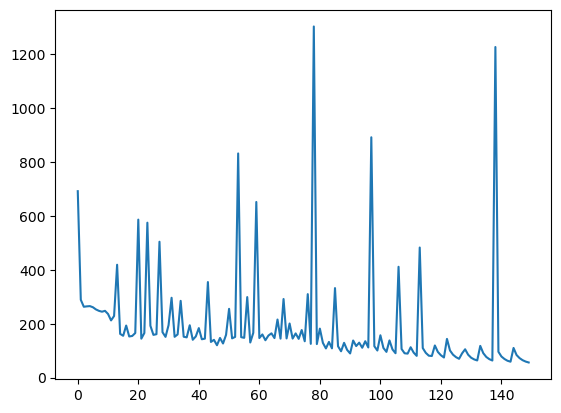

Error rate: 0.04791666666666672


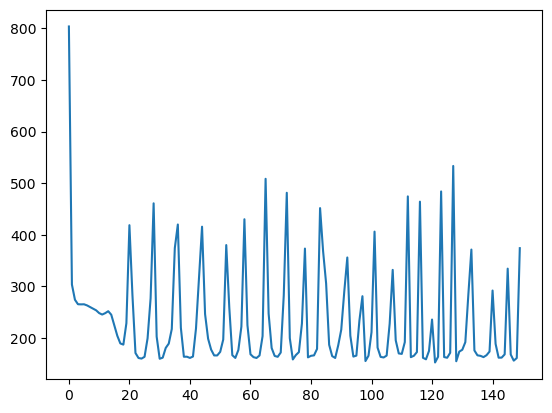

Error rate: 0.4083333333333333


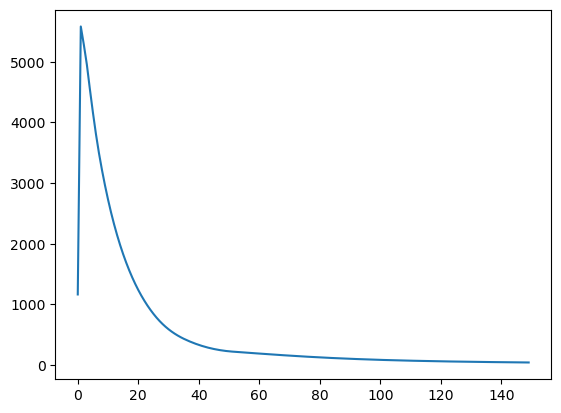

Error rate: 0.008333333333333304


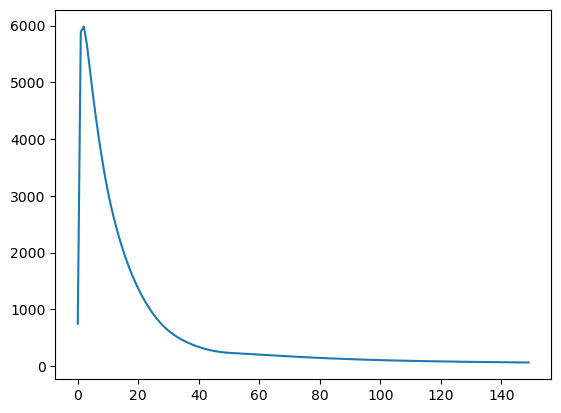

Error rate: 0.01041666666666663


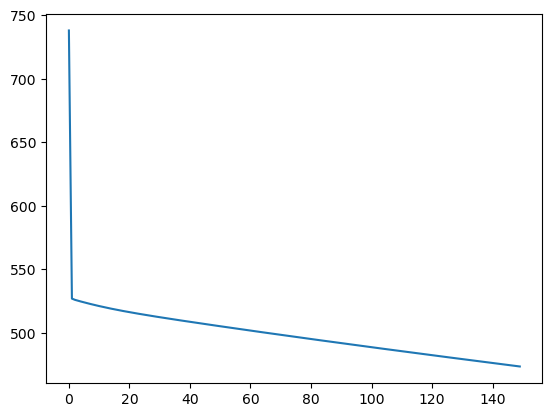

Error rate: 0.48958333333333337


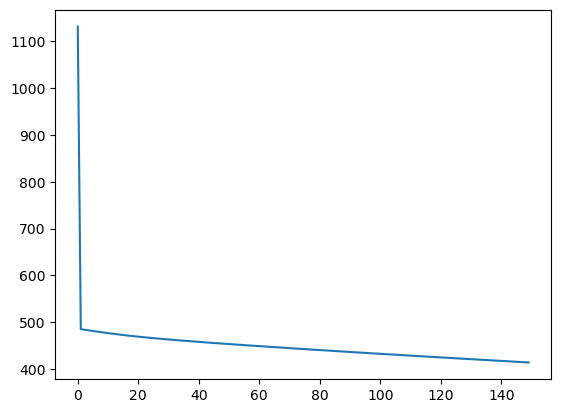

Error rate: 0.5104166666666667


In [5]:
grid_search = GridSearch(M=300, activation_function='ReLU')

param_dict = {'learning_rate':[1e-3, 1e-4, 1e-5], 'reg':[0.1, 1.1], 'epochs':[3000]}
params_evaluated = grid_search.grid_search(X_train, Y_train, X_test, Y_test, param_dict)

{'learning_rate': 0.0001, 'reg': 0.1, 'epochs': 3000, 'error': 0.01666666666666672}


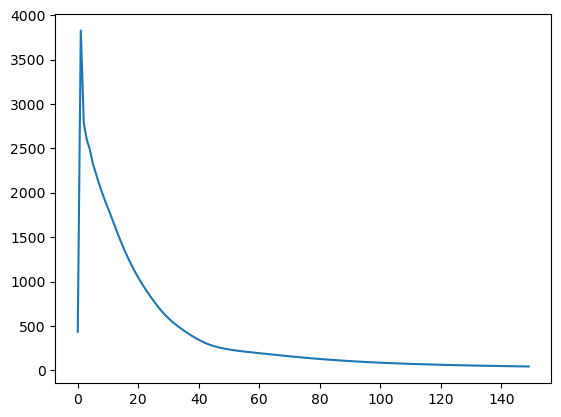

Error rate: 0.002083333333333326


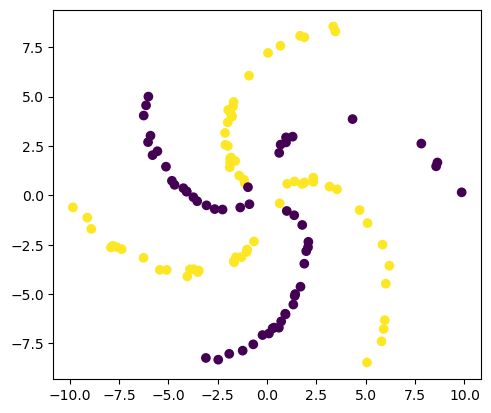

In [6]:
best_params = {key: params_evaluated[0][key] for key in params_evaluated[0].keys() if key != 'error'}
print(params_evaluated[0])

best_model = ANNOneHiddenLayer(M=300, activation_function='ReLU')
best_model.fit(X_train, Y_train, **best_params)
T_pred, error_rate = best_model.evaluate(X_test, Y_test)

plt.scatter(X_test[:,0], X_test[:, 1], c=T_pred)
plt.axis('scaled')
plt.show()